### **Number of Registered/Certified Businesses**

This dataset contains information on certified businesses for District 7 and Boston City and presents a comparative analysis, including details on their industry categories, types of certifications, employee sizes, small business statuses, and geographical locations. The certifications tracked include minority-owned (MBE), women-owned (WBE), veteran-owned, and SDO-certified businesses, reflecting the diversity and specialized certifications of businesses within various industries. Additionally, the dataset captures information on small local business certifications and categorizes businesses by industry and service type.

The goal of this analysis is to provide actionable insights into the landscape of certified businesses, offering a foundation for understanding 
diversity, local business representation, and certification trends across different industries. The dataset can be accessed here: https://data.boston.gov/dataset/certified-business-directory


#### **1. Loading necessary libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import pandas as pd

#### **2. Performing Exploratory Data Analysis**

In [38]:
df = pd.read_csv("certified_business.csv")
df.head()

,ID,company_name,services_provided,mbe_wbe_cert,small_local_cert,veteran_cert,sdo_certified,city_registered,address,city,...,cob_category_codes2,cob_category_codes3,naics_codes1,naics_codes2,naics_codes3,unspsc_code1,unspsc_code2,unspsc_code3,lat_long,census tract
0,1,"813 Consultants, LLC","Low overhead staffing, payroll, and consulting...",WBE,SLBE,NaN,Yes,Yes,"10 Coniston Road, Roslindale, MA 02131",Roslindale,...,"EM - Employement (see also OS, TR)",NaN,561320 - Temporary Help Services,541214 - Payroll Services,561110 - Office Administrative Services,80110000 - Human resources services,NaN,NaN,"-71.131853188571,42.29141615705",110607
1,2,A & M Home Services LLC,Landscape; hardscape; excavation; bobcat servi...,MBE,SLBE,NaN,No,Yes,"34 Vale Street, Roxbury, MA 2119",Roxbury,...,"SI - Sitework (Excavation, Demolition, Utiliti...",SN - Snow Removal/Plowing (see also TK),561730 - Landscaping Services,238990 - All Other Specialty Trade Contractors,NaN,30120000 - Roads and landscape,22100000 - Heavy construction machinery and eq...,78140000 - Transport services,"-71.094375140331,42.322195027603",81500
2,3,A & S Construction and Demolition Co.,Lead abatement; asbestos removal; home repair ...,MBE,SLBE,NaN,No,No,"4 Lorna Road, Mattapan, MA 02126",Mattapan,...,"SI - Sitework (Excavation, Demolition, Utiliti...",GC - General Contractors,562910 - Remediation Services,238910 - Site Preparation Contractors,NaN,72110000 - Residential building construction s...,72120000 - Nonresidential building constructio...,76100000 - Decontamination services,"-71.082278468301,42.279858861338",101002
3,4,"A Better Resolution, Inc.",Audio/visual production; multimedia production,MBE,SLBE,NaN,No,No,"42 8th Street, Suite 3210, Charlestown, MA 2129",Charlestown,...,ET - Entertainment/Entertainer,NaN,532490 - Other Commercial and Industrial Machi...,512110 - Motion Picture and Video Production,NaN,45110000 - Audio and visual presentation and c...,NaN,NaN,"-71.052764248695,42.374884012213",40801
4,5,Amy Branger,Management consulting and executive coaching,WBE,NaN,NaN,Yes,Yes,"42 Eighth Street, Charlestown, MA 2129",Charlestown,...,BU - Business Management Consultants,NaN,541611 - Administrative Management and General...,541618 - Other Management Consulting Services,NaN,NaN,NaN,NaN,"-71.052764248695,42.374884012213",40801


In [39]:
df[['longitude','latitude']] = df['lat_long'].str.split(',', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

In [40]:
census_tract_values = [
    '80601', '10403', '707', '103', '9811', '120201', '9803', '10404', '10405', '801', 
    '120301', '71101', '913', '105', '110105', '10206', '81301', '81302', '70502', 
    '821', '106', '706', '803', '80401', '805', '80801', '809', '814', '815', '817', 
    '818', '819', '820', '901', '902', '903', '904', '906', '907', '914', '924', '70902', 
    '70802', '70801', '70901'
]

In [41]:
df_district7 = df[df['census tract'].astype(str).isin(census_tract_values)]
df_district7.head()

,ID,company_name,services_provided,mbe_wbe_cert,small_local_cert,veteran_cert,sdo_certified,city_registered,address,city,...,naics_codes1,naics_codes2,naics_codes3,unspsc_code1,unspsc_code2,unspsc_code3,lat_long,census tract,longitude,latitude
15,#REF!,"Dragonfly Financial Solutions, LLC",Financial capability and asset building consul...,WBE,NaN,NaN,Yes,No,"67 Orchardhill Road, Jamaica Plain, MA 02130",Jamaica Plain,...,541618 - Other Management Consulting Services,541219 - Other Accounting Services,NaN,80100000 - Management advisory services,NaN,NaN,"-71.110925666581,42.29918599518",110105,-71.110926,42.299186
32,#REF!,"John B. Cruz Construction Company, Inc.",General contractors specializing in constructi...,MBE,SLBE,NaN,Yes,Yes,"One John Elliot Square, Roxbury, MA 2119",Roxbury,...,236115 - New Single-Family Housing Constructio...,236116 - New Multifamily Housing Construction ...,237210 - Land Subdivision,72110000 - Residential building construction s...,72120000 - Nonresidential building constructio...,NaN,"-71.091264390637,42.330021959488",80601,-71.091264,42.330022
53,#REF!,"Studio G Architects, Inc.",Architectural services; community planning; a...,WBE,SLBE,NaN,Yes,Yes,"179 Boylston Street, The Brewery, Building P, ...",Jamaica Plain,...,541310 - Architectural Services,NaN,NaN,72110000 - Residential building construction s...,72120000 - Nonresidential building constructio...,NaN,"-71.102449099012,42.315347961537",120301,-71.102449,42.315348
54,#REF!,"Supplier Diversity Experts, LLC",Supplier diversity program implementation and ...,MWBE,NaN,NaN,Yes,Yes,"301 Highland Street, Suite 2, Roxbury, MA 02119",Roxbury,...,541611 - Administrative Management and General...,541618 - Other Management Consulting Services,NaN,80100000 - Management advisory services,NaN,NaN,"-71.096450574254,42.323882416144",81302,-71.096451,42.323882
60,#REF!,Urban Edge Housing Corporation,"Developers of low-income, affordable rental an...",MBE,NaN,NaN,Yes,Yes,"1542 Columbus Avenue, Roxbury, MA 02119",Roxbury,...,531390 - Other Activities Related to Real Estate,NaN,NaN,80130000 - Real estate services,93140000 - Community and social services,NaN,"-71.098348082166,42.323299745739",81302,-71.098348,42.323300


In [42]:
df_district7['number_employees'].value_counts()

number_employees
Less than 20    9
21 - 40         2
Name: count, dtype: int64

In [43]:
df_district7_new = df_district7[df_district7['number_employees'] != '20-Nov']
df_clean = df_district7_new['number_employees'].value_counts()
df_clean

number_employees
Less than 20    9
21 - 40         2
Name: count, dtype: int64

#### **3. Visualizing key metrics and relationships**

##### **3.1 SDO Certification Distribution**

This analysis presents the distribution of Supplier Diversity Office (SDO) Certification among businesses in District 7 and Boston City. The SDO certification aims to support diverse businesses by recognizing those that meet specific diversity and inclusion standards. This visualization allows stakeholders to see the proportion of SDO-certified businesses within the district. The pie chart breaks down the count of businesses that are SDO-certified versus those that are not.

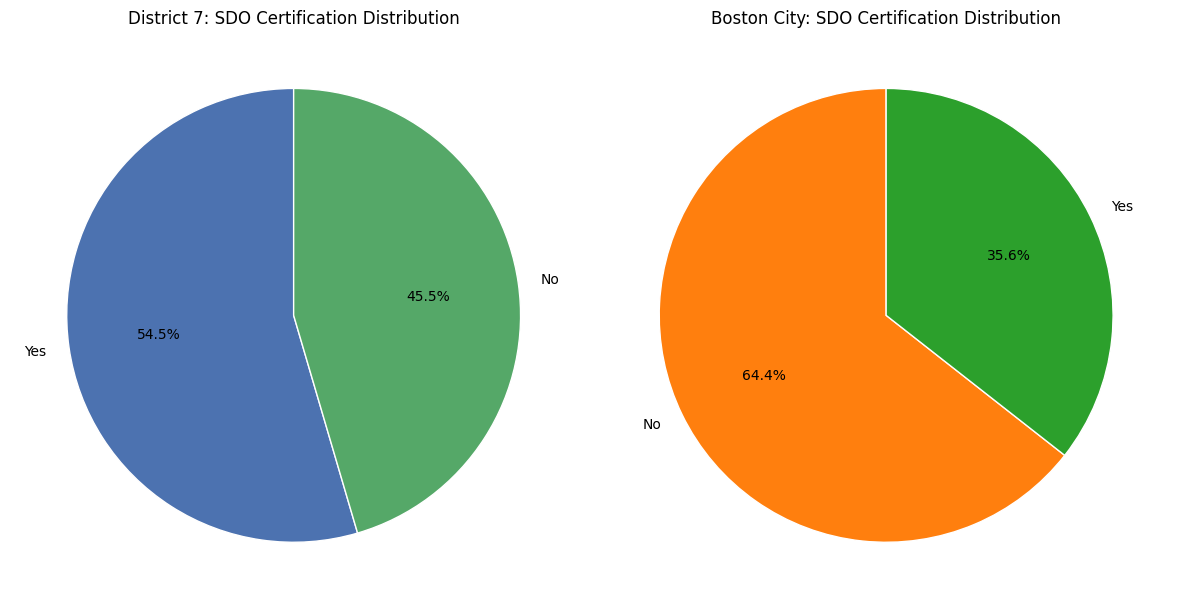

In [44]:
sdo_certified_dist_d7 = df_district7['sdo_certified'].value_counts().reset_index()
sdo_certified_dist_d7.columns = ['SDO Certified', 'Count']
sdo_certified_dist_city = df['sdo_certified'].value_counts().reset_index()
sdo_certified_dist_city.columns = ['SDO Certified', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    sdo_certified_dist_d7['Count'],
    labels=sdo_certified_dist_d7['SDO Certified'],
    autopct='%1.1f%%',  
    startangle=90,
    colors=['#4c72b0', '#55a868'], 
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('District 7: SDO Certification Distribution', fontsize=12)

axes[1].pie(
    sdo_certified_dist_city['Count'],
    labels=sdo_certified_dist_city['SDO Certified'],
    autopct='%1.1f%%',  
    startangle=90,
    colors=['#ff7f0e', '#2ca02c'], 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Boston City: SDO Certification Distribution', fontsize=12)

plt.tight_layout()
plt.show()

##### Insights:

- This chart reveals the prevalence of SDO-certified businesses in District 7 and Boston City, providing insight into the overall landscape of supplier diversity in the region.

- Understanding the proportion of SDO-certified businesses can inform support strategies for non-certified businesses that may benefit from assistance in meeting SDO standards.


##### **3.2 City Registration Distribution**

This analysis shows the City Registration Status of businesses in District 7 and Boston City. City registration indicates that a business is formally registered with the local government, which may be required for certain licenses, permits, or other regulatory purposes. This chart helps us understand the proportion of businesses that are officially registered with the city, giving insight into the local business compliance landscape. The pie chart categorizes businesses based on their city registration status, dividing them into registered and non-registered entities.

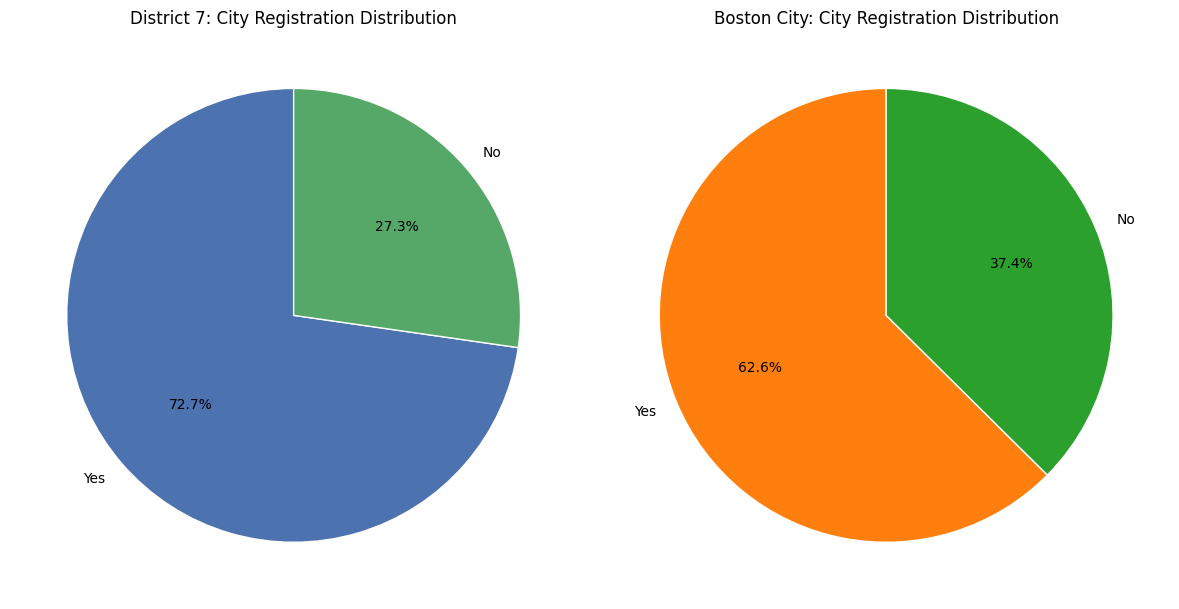

In [45]:
city_registered_dist_d7 = df_district7['city_registered'].value_counts().reset_index()
city_registered_dist_d7.columns = ['City Registered', 'Count']
city_registered_dist_city = df['city_registered'].value_counts().reset_index()
city_registered_dist_city.columns = ['City Registered', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    city_registered_dist_d7['Count'],
    labels=city_registered_dist_d7['City Registered'],
    autopct='%1.1f%%',  
    startangle=90,  
    colors=['#4c72b0', '#55a868'],  
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('District 7: City Registration Distribution', fontsize=12)

axes[1].pie(
    city_registered_dist_city['Count'],
    labels=city_registered_dist_city['City Registered'],
    autopct='%1.1f%%',  
    startangle=90,  
    colors=['#ff7f0e', '#2ca02c'],  
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Boston City: City Registration Distribution', fontsize=12)

plt.tight_layout()
plt.show()

##### Insights:

- This chart helps identify the proportion of businesses that comply with city registration requirements, providing a measure of formal business engagement with local governance.

- Understanding the registration distribution can assist in developing outreach initiatives to support non-registered businesses, potentially guiding them towards formal registration.



##### **3.3 Company Size Distribution by Number of Employees**

This analysis explores the Company Size Distribution of businesses in District 7 and Boston City, using the number of employees as an indicator of company size. This bar chart categorizes businesses based on their employee count, allowing stakeholders to understand the scale of businesses operating within the district. The bar chart segments businesses by their reported number of employees, ranging from small to large entities.

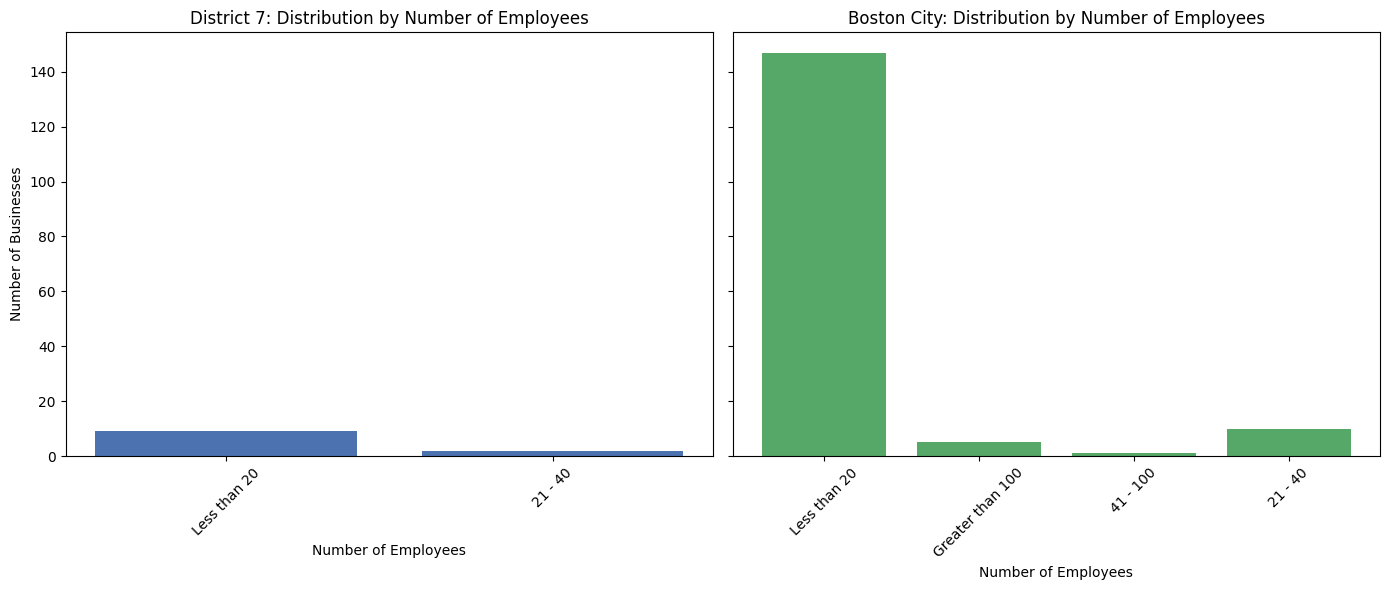

In [46]:
employees_dist_d7 = df_district7['number_employees'].value_counts().reset_index()
employees_dist_d7.columns = ['Number of Employees', 'Count']
employees_dist_d7 = employees_dist_d7.sort_values(by='Number of Employees', ascending=False)

employees_dist_city = df['number_employees'].value_counts().reset_index()
employees_dist_city.columns = ['Number of Employees', 'Count']
employees_dist_city = employees_dist_city.sort_values(by='Number of Employees', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  
axes[0].bar(employees_dist_d7['Number of Employees'], employees_dist_d7['Count'], color='#4c72b0')
axes[0].set_title('District 7: Distribution by Number of Employees', fontsize=12)
axes[0].set_xlabel('Number of Employees', fontsize=10)
axes[0].set_ylabel('Number of Businesses', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(employees_dist_city['Number of Employees'], employees_dist_city['Count'], color='#55a868')
axes[1].set_title('Boston City: Distribution by Number of Employees', fontsize=12)
axes[1].set_xlabel('Number of Employees', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Insights:

- This chart reveals whether District 7 and Boston City are predominantly composed of small businesses or if there are significant numbers of medium and large businesses, offering insights into the district’s economic structure.

- Understanding the distribution of business sizes can help allocate resources and support tailored to different company sizes, ensuring that small, medium, and large businesses all receive appropriate assistance.


##### **3.4 Certification Breakdown**

This analysis presents the Certification Breakdown of businesses in District 7 and Boston City, focusing on certifications such as MBE (Minority Business Enterprise), WBE (Women Business Enterprise), MWBE (Minority and Women Business Enterprise), and others. This pie chart visually represents the distribution of these certification types, highlighting the diversity within the district’s business community. The pie chart categorizes businesses based on their certification type, showcasing the proportion of each type within District 7 and Boston City.

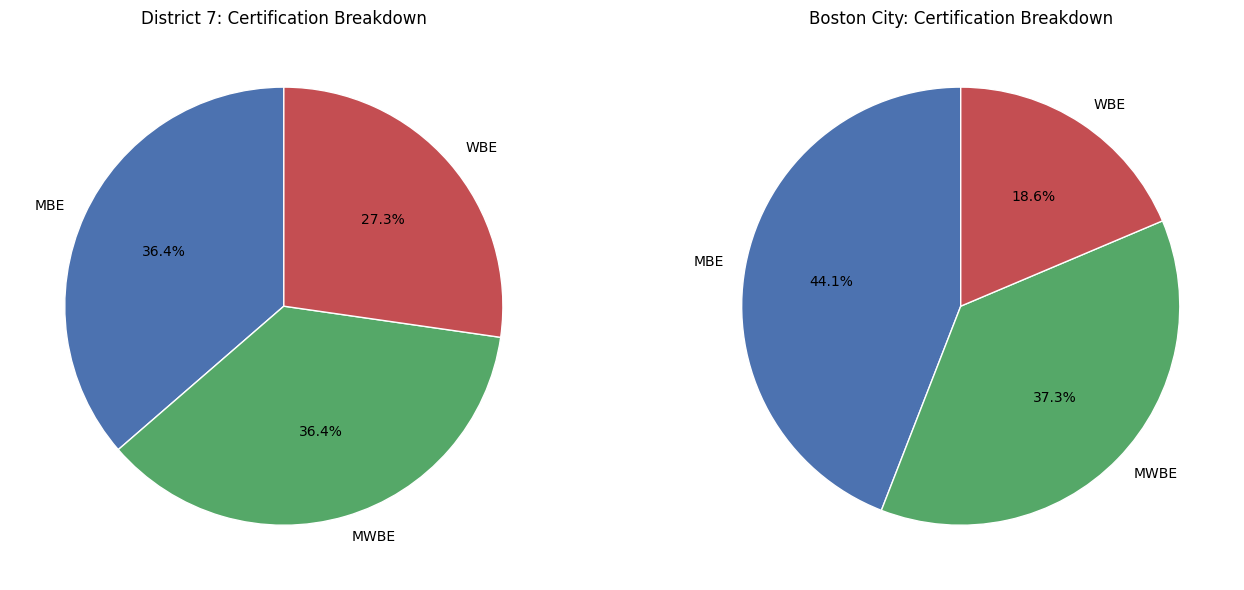

In [47]:
certification_breakdown_d7 = df_district7['mbe_wbe_cert'].value_counts().reset_index()
certification_breakdown_d7.columns = ['Certification Type', 'Count']

certification_breakdown_city = df['mbe_wbe_cert'].value_counts().reset_index()
certification_breakdown_city.columns = ['Certification Type', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

axes[0].pie(
    certification_breakdown_d7['Count'],
    labels=certification_breakdown_d7['Certification Type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4c72b0', '#55a868', '#c44e52', '#8172b2'], 
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('District 7: Certification Breakdown', fontsize=12)

axes[1].pie(
    certification_breakdown_city['Count'],
    labels=certification_breakdown_city['Certification Type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4c72b0', '#55a868', '#c44e52', '#8172b2'], 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Boston City: Certification Breakdown', fontsize=12)

plt.tight_layout()
plt.show()


##### Insights:

- This chart reveals the prevalence of different certification types, helping stakeholders assess the diversity of business ownership in District 7 as compared to Boston City. A higher proportion of certain certifications (e.g., MWBE) may indicate a strong presence of diverse and inclusive businesses.

- Tracking certification distribution over time can help evaluate the success of diversity and inclusion initiatives, providing a basis for future policy and support programs.

##### **3.5 Small Local Business Certification Distribution**

This analysis illustrates the Distribution of Small Local Business Certifications among businesses in District 7 and Boston City. Small local business certifications indicate that a business meets certain criteria as a small, locally owned enterprise, often eligible for local support programs. This pie chart shows the proportion of businesses that have obtained this certification, offering insights into the presence of small, locally focused businesses within the district as well as Boston City.

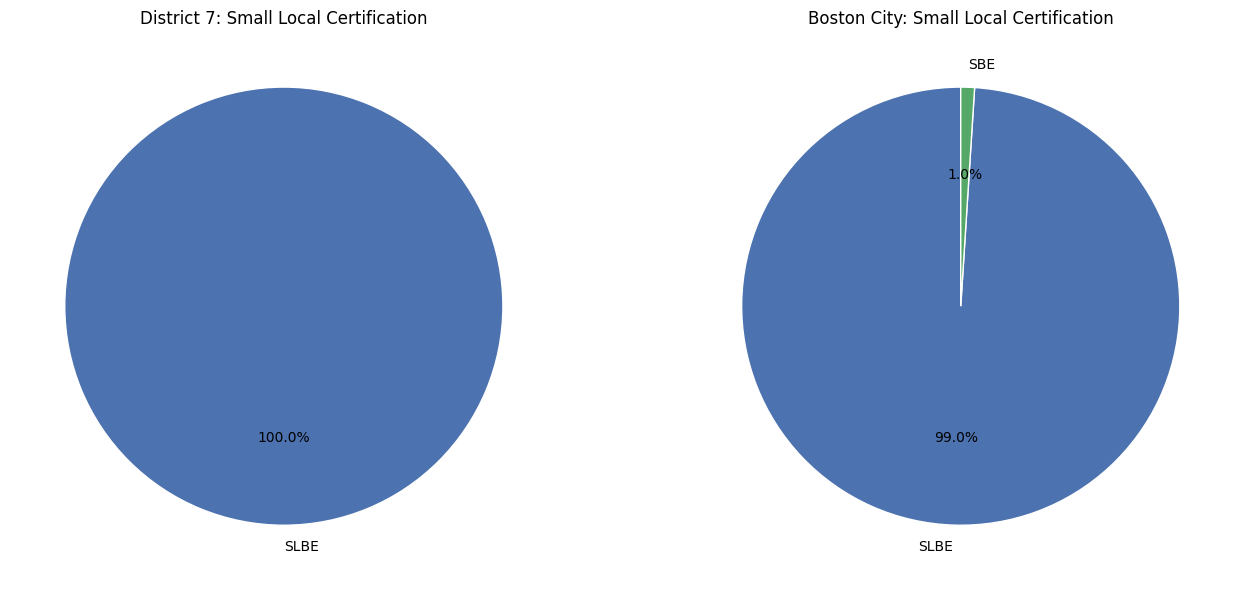

In [48]:
small_local_cert_dist_d7 = df_district7['small_local_cert'].value_counts().reset_index()
small_local_cert_dist_d7.columns = ['Small Local Certification', 'Count']

small_local_cert_dist_city = df['small_local_cert'].value_counts().reset_index()
small_local_cert_dist_city.columns = ['Small Local Certification', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

axes[0].pie(
    small_local_cert_dist_d7['Count'],
    labels=small_local_cert_dist_d7['Small Local Certification'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4c72b0', '#55a868'], 
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('District 7: Small Local Certification', fontsize=12)

axes[1].pie(
    small_local_cert_dist_city['Count'],
    labels=small_local_cert_dist_city['Small Local Certification'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4c72b0', '#55a868'],  
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Boston City: Small Local Certification', fontsize=12)

plt.tight_layout()
plt.show()


##### Insights:

- This chart reveals the extent to which small local businesses are present in District 7 as compared to Boston City, highlighting the role of locally owned enterprises in the district’s economy.

- Knowing the proportion of small local businesses can help guide support initiatives, encouraging more small businesses to gain certification or supporting certified businesses in their growth.


##### **3.6 Employee Size vs. Certification Type**

This analysis examines the relationship between Employee Size and Certification Type for businesses. By categorizing businesses based on the number of employees and their certification type (e.g., MBE, WBE, MWBE), this bar chart provides insights into the diversity landscape across different company sizes.

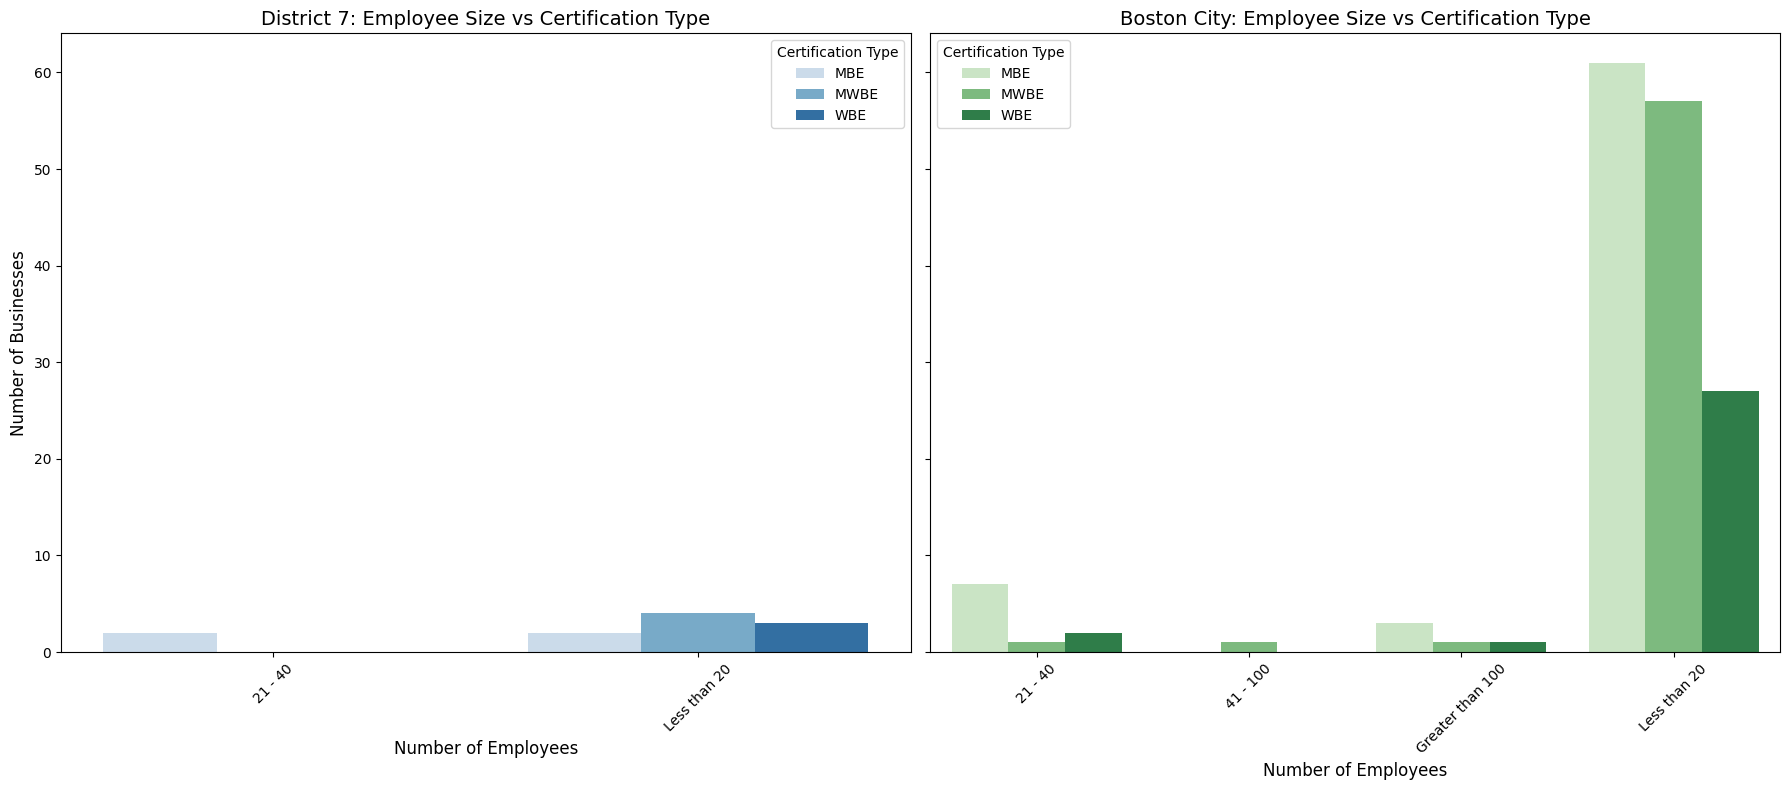

In [49]:
employee_vs_certification_d7 = df_district7.groupby(['number_employees', 'mbe_wbe_cert']).size().reset_index(name='Count')
employee_vs_certification_city = df.groupby(['number_employees', 'mbe_wbe_cert']).size().reset_index(name='Count')

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

sns.barplot(
    data=employee_vs_certification_d7,
    x='number_employees',
    y='Count',
    hue='mbe_wbe_cert',
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('District 7: Employee Size vs Certification Type', fontsize=14)
axes[0].set_xlabel('Number of Employees', fontsize=12)
axes[0].set_ylabel('Number of Businesses', fontsize=12)
axes[0].legend(title='Certification Type', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=employee_vs_certification_city,
    x='number_employees',
    y='Count',
    hue='mbe_wbe_cert',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Boston City: Employee Size vs Certification Type', fontsize=14)
axes[1].set_xlabel('Number of Employees', fontsize=12)
axes[1].set_ylabel('') 
axes[1].legend(title='Certification Type', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### Insights:

- This chart highlights the presence of different certification types within small, medium, and large businesses. Patterns may reveal if minority-owned or women-owned certifications are more prevalent in certain business sizes.

- Understanding the breakdown of certification types by company size can help tailor support programs. For example, if most certified businesses are small, resources could be directed toward helping these companies grow.

##### **3.7 Employee Size vs. Small Business Certification**

This analysis explores the relationship between Employee Size and Small Business Certification status for businesses. By categorizing businesses based on the number of employees and their small business certification status, this bar chart offers insights into the scale and reach of certified small businesses within the district.

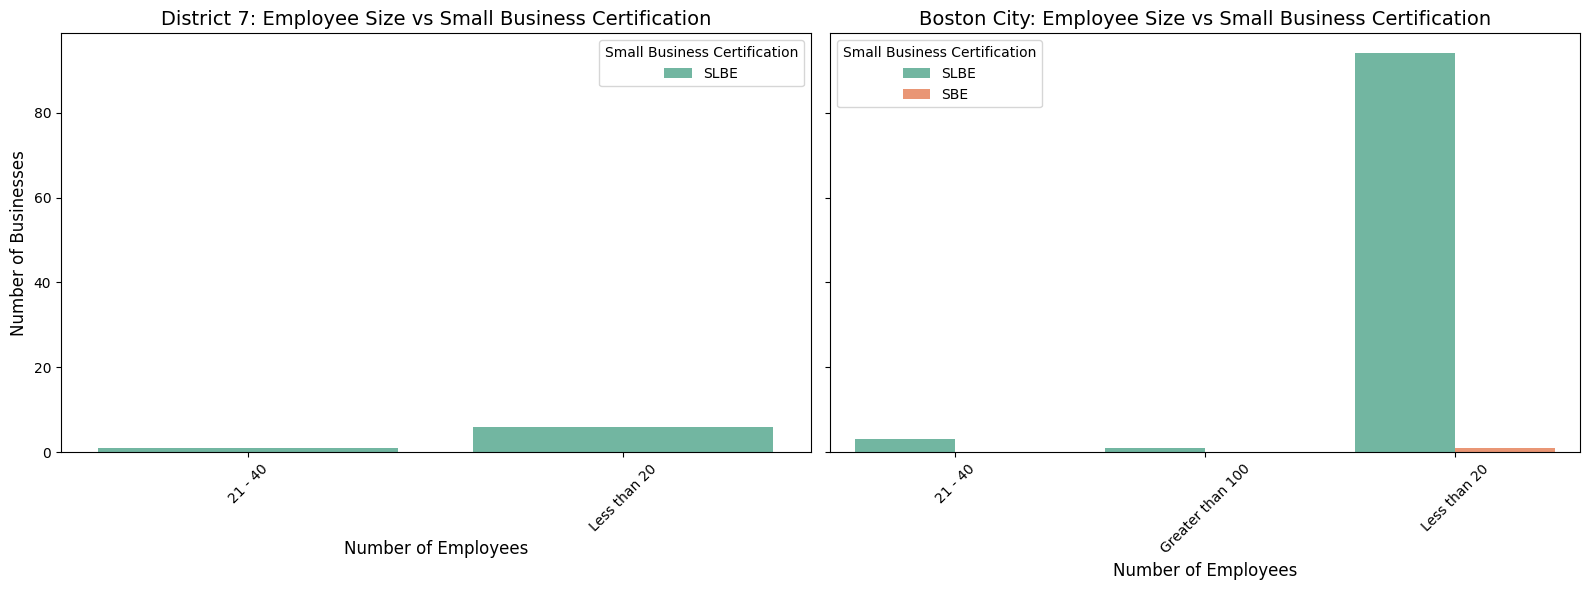

In [50]:
employee_vs_small_certification_d7 = df_district7.groupby(['number_employees', 'small_local_cert']).size().reset_index(name='Count')
employee_vs_small_certification_city = df.groupby(['number_employees', 'small_local_cert']).size().reset_index(name='Count')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(
    data=employee_vs_small_certification_d7,
    x='number_employees',
    y='Count',
    hue='small_local_cert',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('District 7: Employee Size vs Small Business Certification', fontsize=14)
axes[0].set_xlabel('Number of Employees', fontsize=12)
axes[0].set_ylabel('Number of Businesses', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Small Business Certification', fontsize=10)

sns.barplot(
    data=employee_vs_small_certification_city,
    x='number_employees',
    y='Count',
    hue='small_local_cert',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Boston City: Employee Size vs Small Business Certification', fontsize=14)
axes[1].set_xlabel('Number of Employees', fontsize=12)
axes[1].set_ylabel('') 
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Small Business Certification', fontsize=10)

plt.tight_layout()
plt.show()


##### Insights:

- This chart highlights the concentration of small business certifications across different employee sizes, showing if most certified small businesses are smaller (e.g., less than 10 employees) or if some certifications extend to larger companies.

- Understanding which sizes of businesses are more likely to be certified as small local businesses can help in designing support programs tailored to their needs. For instance, if most small certified businesses are very small, they might benefit from growth assistance.

##### **3.8 Visualising District 7 and Boston City Certified Businesses on a map**


In [59]:
import folium
from folium.plugins import MarkerCluster

# Initialize a map centered around Boston
map_combined = folium.Map(location=[42.3601, -71.0589], zoom_start=12)  # Boston City center

# Add businesses from Boston City dataset
marker_cluster_boston = MarkerCluster(name="Boston City Businesses").add_to(map_combined)
for _, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Business Name: {row['company_name']}<br>Service: {row['services_provided']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster_boston)

# Add businesses from District 7 dataset
marker_cluster_district7 = MarkerCluster(name="District 7 Businesses").add_to(map_combined)
for _, row in df_district7.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Business Name: {row['company_name']}<br>Service: {row['services_provided']}",
            icon=folium.Icon(color='orange', icon='info-sign')
        ).add_to(marker_cluster_district7)

# Add a layer control to toggle between Boston City and District 7 businesses
folium.LayerControl().add_to(map_combined)

# Save the map as HTML
map_combined.save("certified_businesses_map.html")
map_combined

#### **Conclusion:**

This analysis provides an in-depth look into the registered/certified business landscape of District 7 along with a comparative analysis with Boston City, focusing on diversity, small business representation, and business growth over time. By examining a variety of factors—such as certification types, business size, longevity, and registration status—this analysis offers valuable insights into the economic makeup of District 7 and highlights areas for potential development and support.

This analysis underscores the importance of diversity, small business support, and targeted resources for local economic development. Stakeholders can use these insights to:
- Develop **support programs** tailored to the specific needs of certified small businesses and those in high-growth areas.

- **Promote diversity and inclusion** by supporting businesses that contribute to a more inclusive economic landscape.

- **Encourage formal registration** among businesses, helping them access resources and comply with city regulations.

- Monitor **long-term stability** and growth patterns, ensuring that both newer and established businesses receive appropriate support.